<a href="https://colab.research.google.com/github/nag-r/colab-notebooks/blob/main/DD_Post_Module_Assignment_5_Nag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Part 1: Use a Web API to get URLs for news articles**

*   Go to https://newsapi.org and create an account and get a key
*   Write a function getNews(source) that accepts the name of a sourse, queries the NewsAPI, and returns back a list of URLs with the news stories that appear in that source.

In [ ]:
# create an account in newsapi.org and obtain the key
newsapi_key = '1dd3e90294f944c98f653a218f3a8ff4'

In [ ]:
# create a function that accepts name of the source, queries the newsAPI and returns back a list of URL's with the news stories
def getNews(source):
  import requests # import requests library
  import json # import json library
  apiKey = "4cc4aec63b9341b69526387e68307c32"
  endpoint = "https://newsapi.org/v2/top-headlines"
  
  # define the parameters to the api call
  parameters = {
      "sources": source,
      "apiKey" : apiKey,      
  }

  urlsources = requests.get(endpoint,params=parameters)
  urllistsummary = urlsources.json()
  # use for loop to extract the url's from articles
  urllist = []
  for url in urllistsummary["articles"]:
    urllist.append(url["url"])
  
  return urllist


In [ ]:
# test function by extracting news article links for source "the-wall-street-journal"
getNews("the-wall-street-journal")

['https://www.wsj.com/articles/there-was-nothing-there-miami-condo-survivors-recount-escapes-wait-for-word-of-missing-11624669341?mod=hp_lead_pos7',
 'https://www.wsj.com/articles/ufo-report-cites-unidentified-aerial-phenomena-that-defy-worldly-explanation-u-s-official-says-11624653953?mod=hp_lead_pos10',
 'https://www.wsj.com/articles/hotels-and-restaurants-rebound-summer-held-back-by-shortages-of-everything-11624640378?mod=hp_lead_pos8',
 'https://www.wsj.com/articles/bidens-infrastructure-antipoverty-plans-face-narrow-path-to-passage-11624640079?mod=hp_lead_pos6',
 'https://www.wsj.com/articles/7-ways-covid-has-changed-the-world-forever-11624636801?mod=hp_lead_pos9',
 'https://www.wsj.com/articles/justice-department-to-sue-georgia-over-its-new-voting-law-11624632808?mod=hp_lead_pos2',
 'https://www.wsj.com/articles/india-warns-of-new-versions-of-delta-variant-spreading-11624621207?mod=hp_lead_pos5',
 'https://www.wsj.com/articles/derek-chauvin-sentencing-11624566871?mod=hp_lead_pos1

In [ ]:
# get the list of articles from various news sources
import requests # import requests library
import json # import json library
apiKey = "4cc4aec63b9341b69526387e68307c32"
endpt = "https://newsapi.org/v2/everything"

# define the parameters to the api call
parameters = {
    "apiKey" : apiKey,
    "domains": "techcrunch.com",
    "from"   : "2021-06-19", # todays date
    "to"     : "2021-06-19", # todays date
    "language" : "en",
    "sortBy" : "popularity",
    "pageSize": 100
}

results = requests.get(endpt,params=parameters)
newsarticle = results.json()
# identify the keys in the result dictionary
newsarticle.keys()

# view the article structure published from techcrunch.com
newsarticle["articles"]

# print the top news titles from the article dictionary
i=0
for title in newsarticle["articles"]:
  newstitles = title["title"]
  i += 1
  print(i,newstitles)

1 Dollars, deals and the importance of nondilutive capital
2 Investors say Eindhoven poised to become Netherlands' No. 2 tech hub
3 Investors say Eindhoven poised to become Netherlands’ No. 2 tech hub - TechCrunch
4 This Week in Apps: Spotify debuts a Clubhouse rival, Facebook tests Audio Rooms in US, Amazon cuts Appstore commissions
5 Dollars, deals and the importance of nondilutive capital – TechCrunch


In [ ]:
# BONUS: capture the articles in a data frame
import pandas as pd
from datetime import datetime

newslist = []
for article in newsarticle["articles"]:
  news_article_data = {}
  news_article_data['source'] = article['source']['name']
  news_article_data['title'] = article['title']
  news_article_data['description'] = article['description']
  news_article_data['author'] = article['author']
  d = datetime.fromisoformat(article['publishedAt'][:-1])  
  news_article_data['date_published'] = d.strftime('%Y-%m-%d %H:%M:%S')
  news_article_data['url'] = article['url']
  newslist.append(news_article_data)

newslist

# capture the news article data in a dataframe
df = pd.DataFrame(newslist)
left_aligned_df = df.style.set_properties(**{'text-align': 'left'})
left_aligned_df = left_aligned_df.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
left_aligned_df


,source,title,description,author,date_published,url
0,TechCrunch,"Dollars, deals and the importance of nondilutive capital","This week, HBCUvc, a nonprofit that aims to diversify the world of venture capital, launched a million-dollar fund. Founder Hadiyah Mujhid told me that the...",Natasha Mascarenhas,2021-06-19 18:00:48,https://techcrunch.com/2021/06/19/dollars-deals-and-the-importance-of-nondilutive-capital/
1,TechCrunch,Investors say Eindhoven poised to become Netherlands' No. 2 tech hub,"Eindhoven might not immediately spring to mind as a high-tech hub, but the Netherlands city is keen to position itself as a center for deep tech in Europe. ...",Mike Butcher,2021-06-19 06:52:10,https://techcrunch.com/2021/06/18/investors-say-eindhoven-poised-to-become-netherlands-no-2-tech-hub/
2,TechCrunch,Investors say Eindhoven poised to become Netherlands’ No. 2 tech hub - TechCrunch,"Our survey respondents said Eindhoven might not immediately spring to mind as a high-tech hub, but the Netherlands city is keen to position itself as a center for deep tech in Europe.",Mike Butcher,2021-06-19 06:52:30,http://techcrunch.com/2021/06/18/investors-say-eindhoven-poised-to-become-netherlands-no-2-tech-hub/
3,TechCrunch,"This Week in Apps: Spotify debuts a Clubhouse rival, Facebook tests Audio Rooms in US, Amazon cuts Appstore commissions","Welcome back to This Week in Apps, the weekly TechCrunch series that recaps the latest in mobile OS news, mobile applications and the overall app economy. The app industry continues to grow, with a record 218 billion downloads and $143 billion in global consu…",Sarah Perez,2021-06-19 15:00:09,http://techcrunch.com/2021/06/19/this-week-in-apps-spotify-debuts-a-clubhouse-rival-facebook-tests-audio-rooms-in-us-amazon-cuts-appstore-commissions/
4,TechCrunch,"Dollars, deals and the importance of nondilutive capital – TechCrunch","Today, on Juneteenth, we recognize the efforts this nation still needs to put toward addressing structural racism and disparities, including in the world of tech. This week, HBCUvc, a nonprofit that aims to diversify the world of venture capital, launched a m…",Natasha Mascarenhas,2021-06-19 18:03:22,http://techcrunch.com/2021/06/19/dollars-deals-and-the-importance-of-nondilutive-capital/


**Part 2: Analyze a news article using IBM Watson Natural Language Understanding API**

Use the IBM Watson Natural Language Understanding API, and write a function  extractEntities(url, source) that takes as input a URL, and returns a list of  dictionaries, with every dictionary containing the entity name, the URL where  the entity appeared, the relevance of the entity to the article, and the  sentiment about the entity. 

In [ ]:
# Import libraries and init API Key for IBM Watson NLP
import requests
import json
from pprint import pprint

API_KEY = "f3Wb6EqXg29s9WYow7slv4L_9qADcA1624Ll357SfXY2"
end_point_url = "https://api.us-south.natural-language-understanding.watson.cloud.ibm.com/instances/6d7b7f62-4e77-484c-a2cb-bcc6f5d2c3e0" # IBM Cloud URL for API call

In [ ]:
# create a function to return entity name,URL where the entity appeared, relevance of the entity to the article and the sentiment about the entity

def extractEntities(subjecturl,sourcetitle):
  # end point
  endpoint = f"{end_point_url}/v1/analyze"

  # credentials
  username = "apikey"
  password = API_KEY

  # parameters
  parameters = {
      "version": "2020-08-01",      
  }

  # headers
  headers = {
      "Content-Type":"application/json"
  }

  # watson options
  watson_options = {
      "url": subjecturl,      
      "features": {
          "entities": {
              "sentiment":True,              
              "limit": 10 # maximum number of entities to be extracted                       
          }
          #"categories":{},
          #"concepts":{},
          #"relations":{},
          #"keywords":{},
          #"emotion":{},
          #"metadata": {}
      }

  }

  # capture the response from IBM Watson API in json format
  response = requests.post(endpoint,
                           data=json.dumps(watson_options),
                           headers=headers,
                           params=parameters,
                           auth=(username,password)
                           )
  result = response.json()

  # format output json data
  entity_value_list = result['entities']  
  
  # create a empty list to capture the output list of dictionaries having the entity information
  output_dict_list = []
  
  # loop through the entity and extract the information
  for entity in entity_value_list:
    output_dict = {}
    if entity['type'] != 'Quantity': # exclude entity types as "Quantity" so that we extract only name, organization and text
      output_dict['entity'] = entity['text']
      output_dict['url'] = subjecturl
      output_dict['source'] = sourcetitle
      output_dict['relevance'] = entity['relevance']
      output_dict['sentiment'] = entity['sentiment']['score']
      output_dict_list.append(output_dict)    

  return output_dict_list


In [ ]:
# validate the extractEntities function
subjecturl = 'http://www.politico.com/story/2017/05/23/infrastructure-transportation-trump-budget-238741'
sourcetitle = 'politico'

extractEntities(subjecturl,sourcetitle)

[{'entity': 'Trump administration',
  'relevance': 0.59019,
  'sentiment': 0.634823,
  'source': 'politico',
  'url': 'http://www.politico.com/story/2017/05/23/infrastructure-transportation-trump-budget-238741'},
 {'entity': 'President Donald Trump',
  'relevance': 0.472032,
  'sentiment': -0.393076,
  'source': 'politico',
  'url': 'http://www.politico.com/story/2017/05/23/infrastructure-transportation-trump-budget-238741'},
 {'entity': 'Transportation Secretary Elaine Chao',
  'relevance': 0.437387,
  'sentiment': 0.861965,
  'source': 'politico',
  'url': 'http://www.politico.com/story/2017/05/23/infrastructure-transportation-trump-budget-238741'},
 {'entity': 'Trump',
  'relevance': 0.425712,
  'sentiment': -0.67347,
  'source': 'politico',
  'url': 'http://www.politico.com/story/2017/05/23/infrastructure-transportation-trump-budget-238741'},
 {'entity': 'Trump',
  'relevance': 0.423769,
  'sentiment': 0.333238,
  'source': 'politico',
  'url': 'http://www.politico.com/story/2017/0

**Part 3: Extract the entities that appear in the news**

[a] Using the getNews(source) function, get the URLs of the news stories that appear in the source Wall Street Journal.

[b] Using the getNews(source) function, get the URLs of the news stories that appear in the source The Washington Post.

In [ ]:
# create a function which will accept the news sources name and extract the list of url's by calling the getNews API 
def subject_url_list(*sourcenames):
  sources = list(sourcenames)
  subjecturllist = getNews(sources[0])

  for i in range(1,len(sources)):
    subjecturllist.extend(getNews(sources[i]))

  return subjecturllist

In [ ]:
# get the list of urls from wall street journal
subject_url_list('the-wall-street-journal')


['https://www.wsj.com/articles/search-at-miami-area-condo-collapse-hindered-by-continuing-fire-11624720433?mod=hp_lead_pos7',
 'https://www.wsj.com/articles/pandemic-time-capsule-11624565703?mod=hp_lead_pos10',
 'https://www.wsj.com/articles/johnson-johnson-settles-new-york-opioid-case-for-230-million-11624716067?mod=hp_lead_pos1',
 'https://www.wsj.com/articles/with-covid-19-easing-diplomats-urge-biden-to-lift-unfair-ban-on-european-travelers-11624715243?mod=hp_lead_pos6',
 'https://www.wsj.com/articles/u-s-housing-market-booms-but-small-contractors-miss-out-11624699809?mod=hp_lead_pos3',
 'https://www.wsj.com/articles/new-york-and-other-northeast-states-see-large-drop-in-unemployment-11624699800?mod=hp_lead_pos4',
 'https://www.wsj.com/articles/bitcoin-slumps-toward-another-crypto-winter-11624699802?mod=hp_lead_pos9',
 'https://www.wsj.com/articles/tesla-recalls-285-000-vehicles-in-china-most-of-them-locally-made-11624698587?mod=hp_lead_pos2',
 'https://www.wsj.com/articles/microsoft

In [ ]:
# get the list of urls from The Washington Post
subject_url_list('the-washington-post')


['https://www.washingtonpost.com/video/politics/white-house-press-secretary-psaki-holds-news-conference/2021/06/08/eaea2344-f2a6-46e6-ac27-d61812fdb620_live.html']

[c] Use the extractEntities(url, source) function to extract the entities that appear in The Wall Street Journal.

In [ ]:
# extract the entities by passing the urls retreived from "the-wall-street-journal"
wsj_url_list = subject_url_list('the-wall-street-journal')
wsj_source_name = ['the-wall-street-journal']
wsj_entities_result = []

# use zip to create the iterable for news description source and urls extracted
for name, url in zip(wsj_source_name*1000,wsj_url_list): # the 1000 multiplier is used to account for the shortest lenght of news_source_desc compared to the length of urls returned
  wsj_entity_output = extractEntities(url,name)
  wsj_entities_result.extend(wsj_entity_output)

# print the entities
wsj_entities_result

[{'entity': 'Surfside',
  'relevance': 0.954265,
  'sentiment': -0.846498,
  'source': 'the-wall-street-journal',
  'url': 'https://www.wsj.com/articles/search-at-miami-area-condo-collapse-hindered-by-continuing-fire-11624720433?mod=hp_lead_pos7'},
 {'entity': 'Fla',
  'relevance': 0.85856,
  'sentiment': -0.846498,
  'source': 'the-wall-street-journal',
  'url': 'https://www.wsj.com/articles/search-at-miami-area-condo-collapse-hindered-by-continuing-fire-11624720433?mod=hp_lead_pos7'},
 {'entity': 'Mayor Daniella Levine Cava',
  'relevance': 0.455897,
  'sentiment': -0.277557,
  'source': 'the-wall-street-journal',
  'url': 'https://www.wsj.com/articles/search-at-miami-area-condo-collapse-hindered-by-continuing-fire-11624720433?mod=hp_lead_pos7'},
 {'entity': 'Dade County',
  'relevance': 0.307172,
  'sentiment': 0.825253,
  'source': 'the-wall-street-journal',
  'url': 'https://www.wsj.com/articles/search-at-miami-area-condo-collapse-hindered-by-continuing-fire-11624720433?mod=hp_lea

[d] Use the extractEntities(url, source) function to extract the entities that appear in The Washington Post.

In [ ]:
# extract the entities by passing the urls retreived from "the-washington-post"
wp_url_list = subject_url_list('the-washington-post')
wp_source_name = ['the-washington-post']
wp_entities_result = []

# use zip to create the iterable for news description source and urls extracted
for name, url in zip(wp_source_name*1000,wp_url_list): # the 1000 multiplier is used to account for the shortest lenght of news_source_desc compared to the length of urls returned
  wp_entity_output = extractEntities(url,name)
  wp_entities_result.extend(wp_entity_output)

# print the entities
wp_entities_result

[{'entity': 'Dade condo building',
  'relevance': 0.958279,
  'sentiment': 0,
  'source': 'the-washington-post',
  'url': 'https://www.washingtonpost.com/video/politics/white-house-press-secretary-psaki-holds-news-conference/2021/06/08/eaea2344-f2a6-46e6-ac27-d61812fdb620_live.html'},
 {'entity': 'Florida',
  'relevance': 0.924948,
  'sentiment': -0.93155,
  'source': 'the-washington-post',
  'url': 'https://www.washingtonpost.com/video/politics/white-house-press-secretary-psaki-holds-news-conference/2021/06/08/eaea2344-f2a6-46e6-ac27-d61812fdb620_live.html'},
 {'entity': 'Miami',
  'relevance': 0.602181,
  'sentiment': 0,
  'source': 'the-washington-post',
  'url': 'https://www.washingtonpost.com/video/politics/white-house-press-secretary-psaki-holds-news-conference/2021/06/08/eaea2344-f2a6-46e6-ac27-d61812fdb620_live.html'}]

In [ ]:
# concatenate the results from wsj entity extraction and wp entity extraction
entity_result = wsj_entities_result + wp_entities_result

# print final result
entity_result

[{'entity': 'Surfside',
  'relevance': 0.954265,
  'sentiment': -0.846498,
  'source': 'the-wall-street-journal',
  'url': 'https://www.wsj.com/articles/search-at-miami-area-condo-collapse-hindered-by-continuing-fire-11624720433?mod=hp_lead_pos7'},
 {'entity': 'Fla',
  'relevance': 0.85856,
  'sentiment': -0.846498,
  'source': 'the-wall-street-journal',
  'url': 'https://www.wsj.com/articles/search-at-miami-area-condo-collapse-hindered-by-continuing-fire-11624720433?mod=hp_lead_pos7'},
 {'entity': 'Mayor Daniella Levine Cava',
  'relevance': 0.455897,
  'sentiment': -0.277557,
  'source': 'the-wall-street-journal',
  'url': 'https://www.wsj.com/articles/search-at-miami-area-condo-collapse-hindered-by-continuing-fire-11624720433?mod=hp_lead_pos7'},
 {'entity': 'Dade County',
  'relevance': 0.307172,
  'sentiment': 0.825253,
  'source': 'the-wall-street-journal',
  'url': 'https://www.wsj.com/articles/search-at-miami-area-condo-collapse-hindered-by-continuing-fire-11624720433?mod=hp_lea

[e] Load the extracted entities into a Pandas Dataframe.

In [ ]:
# import pandas library
import pandas as pd

df = pd.DataFrame(entity_result)
df

,entity,url,source,relevance,sentiment
0,Surfside,https://www.wsj.com/articles/search-at-miami-a...,the-wall-street-journal,0.954265,-0.846498
1,Fla,https://www.wsj.com/articles/search-at-miami-a...,the-wall-street-journal,0.858560,-0.846498
2,Mayor Daniella Levine Cava,https://www.wsj.com/articles/search-at-miami-a...,the-wall-street-journal,0.455897,-0.277557
3,Dade County,https://www.wsj.com/articles/search-at-miami-a...,the-wall-street-journal,0.307172,0.825253
4,Miami,https://www.wsj.com/articles/search-at-miami-a...,the-wall-street-journal,0.206404,0.825253
5,Julie Jargon,https://www.wsj.com/articles/pandemic-time-cap...,the-wall-street-journal,0.958279,0.758773
6,U.S.,https://www.wsj.com/articles/pandemic-time-cap...,the-wall-street-journal,0.421639,0.000000
7,Canada,https://www.wsj.com/articles/pandemic-time-cap...,the-wall-street-journal,0.400543,0.000000
8,Johnson & Johnson,https://www.wsj.com/articles/johnson-johnson-s...,the-wall-street-journal,0.925491,-0.499660
9,New York,https://www.wsj.com/articles/johnson-johnson-s...,the-wall-street-journal,0.680609,-0.855282


**Part 4: Create a dashboard**

[a] Use a the pivot table functionality of Pandas to analyze the relevance and sentiment for the entities being discussed in the news, broken down by source.


*   For relevance: As rows of the pivot table keep the entity names, and as columns the sources. As values for the cells put the sum of the relevance scores of the news articles for that entity. This value (sum of relevance) will show how prominently this entity is in the news.
*   For sentiment: As rows of the pivot table keep the entity names, and as columns the sources. As values for the cells put the average score for sentiment of the news articles for that entity.




In [ ]:
# create a pivot table for relevance by entity
import numpy as np
pivot_relevance = pd.pivot_table(
    df, #dataframe
    values = 'relevance', #cell values
    index = 'entity', #rows
    columns = 'source', #columns
    aggfunc = 'sum', # sum of relevance
)
pivot_relevance

source,the-wall-street-journal,the-washington-post
entity,,
AmerisourceBergen Corp.,0.318779,NaN
Apple,0.966306,NaN
Brian Rakowski,0.552478,NaN
Canada,0.400543,NaN
Cardinal Health Inc.,0.302832,NaN
China,0.337108,NaN
Connecticut,0.952760,NaN
Construction USA LLC,0.952545,NaN
Dade County,0.307172,NaN


In [ ]:
# create a pivot for sentiment by entity
import numpy as np
pivot_sentiment = pd.pivot_table(
    df, #dataframe
    values = 'sentiment', #cell values
    index = 'entity', #rows
    columns = 'source', #columns
    aggfunc = 'mean', # avg of sentiment
)
pivot_relevance

source,the-wall-street-journal,the-washington-post
entity,,
AmerisourceBergen Corp.,0.318779,NaN
Apple,0.966306,NaN
Brian Rakowski,0.552478,NaN
Canada,0.400543,NaN
Cardinal Health Inc.,0.302832,NaN
China,0.337108,NaN
Connecticut,0.952760,NaN
Construction USA LLC,0.952545,NaN
Dade County,0.307172,NaN


[b] Use the pivot tables that you created above and use the plot function to create two bar plots:

*   First plot should show the entities on the x-axis and the total relevance score for that entity on the y-axis, broken down by source.
*   Second plot should how the showing the average sentiment for each entity, again broken down by source.





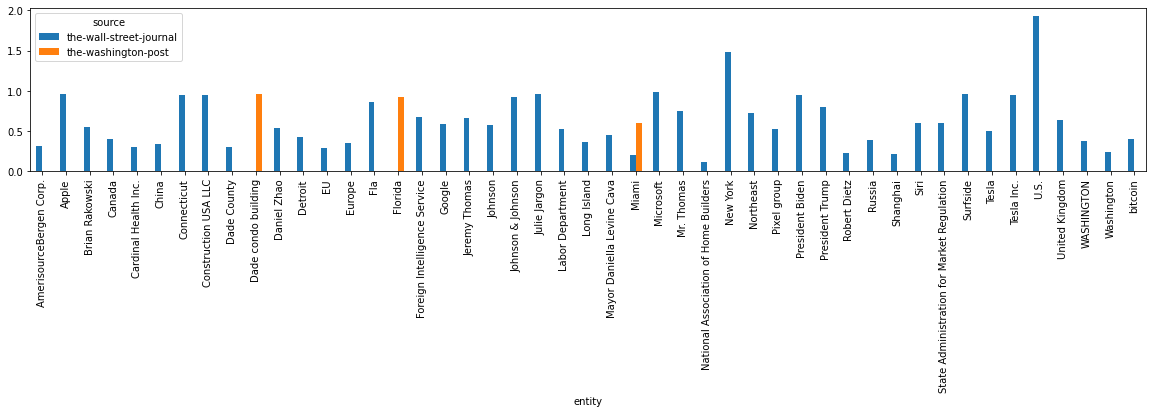

In [ ]:
# plot 1
import matplotlib.pyplot as plt

# format the plot area
plt.rcParams["figure.figsize"] = (20,3)

# print plot
pivot_relevance.plot.bar()

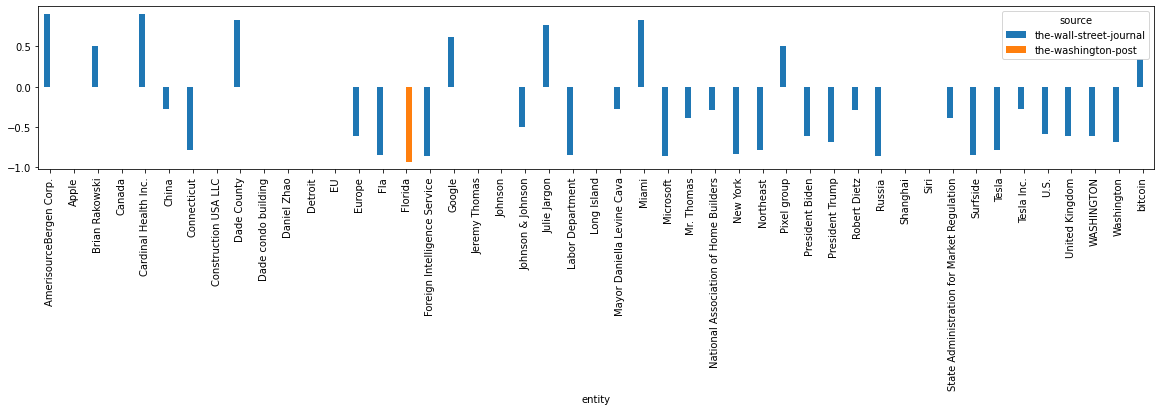

In [ ]:
# plot 2
import matplotlib.pyplot as plt

# format the plot area
plt.rcParams["figure.figsize"] = (20,3)

# print plot
pivot_sentiment.plot.bar()

[c] Potentially, use the dropna function of Pandas, to eliminate from the pivot tables the rows/entities that are discussed in only one of the two news sources. (The dropna() function will remove the rows that contain a NaN value.) Warning: some days, this command may drop all the rows from the table, because no entity appears in both WSJ and WP. 

In [ ]:
# drop NaN values in relevance pivot table
pivot_relevance.dropna()

source,the-wall-street-journal,the-washington-post
entity,,
Miami,0.206404,0.602181


In [ ]:
# drop NaN values in sentiment pivot table
pivot_sentiment.dropna()

source,the-wall-street-journal,the-washington-post
entity,,
Miami,0.825253,0.0
